In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [5]:
def compute(X, y):
	# train test split
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
	regr = linear_model.LinearRegression()

	graph(X_train, y_train)

	return regress(X_train, y_train, regr, transform= concatenated_elements), regress(X_test, y_test, regr, transform=concatenated_elements)

'''
	* create train by selecting index of X and converting to numpy array
	* fit the linear regression
'''
def regress(X, y, regr, transform):
	transform(X)

	regr.fit(X, y)
	y_pred = regr.predict(X)
	error = mean_squared_error(y, y_pred)
	score = r2_score(y, y_pred)
	print("Mean squared error on train: ", error)
	print("Training R2: ", score)
	return error, score


'''
	* convert subarrays of shape (5,5) into single arrays that contain 25 entries
'''
def concatenated_elements(X):
	# remove days 6-10 from training
	for i in range(len(X)):
		try:
			X[i] = np.concatenate(X[i])
		except:
			print(X[i])
'''
	* graph the averages of high/low/open/close of the five 
	* days vs the slope from days 6-10
'''
def graph(X, y):
	X_labels = []
	for i in range(len(X)):
		X_labels.append(np.mean(X[i]))
	
	# print(X_labels)
	plot = sns.scatterplot(x=X_labels, y=y, hue=y)
	plot.set(title= 'average of 5 days vs slope', 
			 xlabel= ('average of high/low/open/close across 5 days'), 
			 ylabel= 'slope of change')
'''
	* split data into 10 day cylcles,
	* find slope of days 6-10,
	* drop days 6-10 so training data includes only
	* "historical data"
'''
def label_data(X, cycle, future):
	# create y label vector.
	# after reading the dataframe in, convert to groups of 10 days
	y = np.zeros((X.shape[0] // cycle))
	X = np.array_split(X, X.shape[0] / cycle)

	# label the 10 day groups based on days 6-10(day 10 close - day 6 open)
	for i in range(len(X)):
		stock_open = X[i].Open.to_numpy()
		stock_close = X[i].Close.to_numpy()
		y[i] = round(stock_close[cycle - 1] - stock_open[cycle - future], 2)
	
	# remove days 6-10 from X
	for i in range(len(X)):
		X[i] = X[i][:cycle - future].to_numpy()
	
	return X, y



Mean squared error on train:  7.8254542235517155
Training R2:  0.1332867896098603
Mean squared error on train:  4.55099606103973
Training R2:  0.4114765244844947


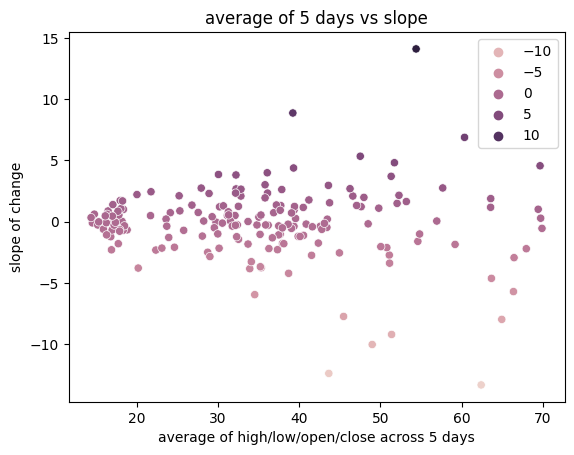

In [6]:
# read in dataframe and reduce to 'Open', 'High', 'Low', 'Close', and 'Volume'
data = pd.read_csv("TWTR.csv")
X = data[['Open', 'High', 'Low', 'Close']]

error_score = []
# create y label vector
X, y = label_data(X, 10, 5)
error_score.append(compute(X, y))


# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean squared error on train:  4.209879019211285
Training R2:  0.03754054654694361
Mean squared error on train:  5.096386806739967
Training R2:  0.09746595055431861


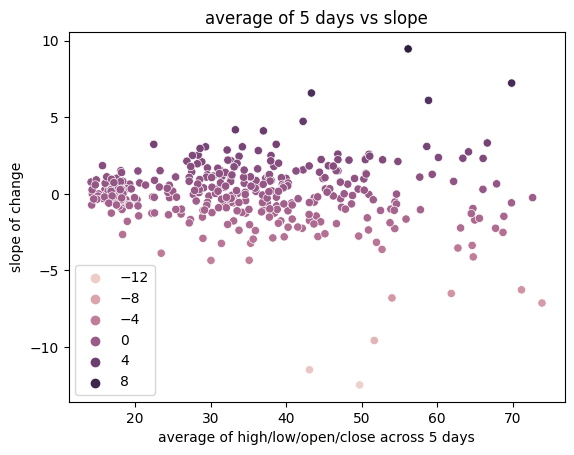

In [7]:
X = data[['Open', 'High', 'Low', 'Close']]
X, y = label_data(X, 5, 3)
error_score.append(compute(X,y))


# regr = linear_model.LinearRegression()

# graph(X_train, y_train)

# regress(X_train, y_train, regr, transform= concatenated_elements)
# regress(X_test, y_test, regr, transform=concatenated_elements)

Mean squared error on train:  2.259833630778794
Training R2:  0.061371119506096306
Mean squared error on train:  1.7110066620459443
Training R2:  0.3841046110817742


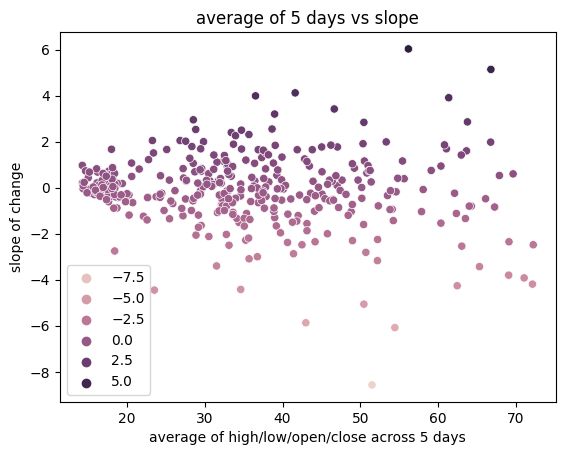

In [8]:

X = data[['Open', 'High', 'Low', 'Close']]
X, y = label_data(X, 5, 2)
error_score.append(compute(X, y))

In [9]:
for i in error_score:
	print(i)
sns.barplot(data=error_score)

((7.8254542235517155, 0.1332867896098603), (4.55099606103973, 0.4114765244844947))
((4.209879019211285, 0.03754054654694361), (5.096386806739967, 0.09746595055431861))
((2.259833630778794, 0.061371119506096306), (1.7110066620459443, 0.3841046110817742))


ValueError: Per-column arrays must each be 1-dimensional

In [11]:
biny = y
for i in range(0, len(biny)):
    if biny[i] > 0:
        biny[i] = 1
    else:
        biny[i] = 0
binX = X

# Creates the binary label based on the y data - if negative, designated with a 0. If positive, given a 1.

nsamples, nx, ny = np.array(binX).shape # X data is reshaped for logistic regression algorithm.
binX = np.array(binX).reshape((nsamples,nx*ny))

binX_train, binX_test, biny_train, biny_test = train_test_split(binX, biny, test_size=0.2, random_state=42) # Train-test split

logreg = LogisticRegression(random_state=42)

logreg.fit(binX_train, biny_train)
logy_pred = logreg.predict(binX_test)

print(logy_pred) # Predicted buys and sells



[0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]


C:\Users\William\Desktop\School Work\COSC\425\Lab1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
cnf_matrix = metrics.confusion_matrix(biny_test, logy_pred) 

print(cnf_matrix)

[[30 17]
 [21 22]]


Text(0.5, 427.9555555555555, 'Predicted label')

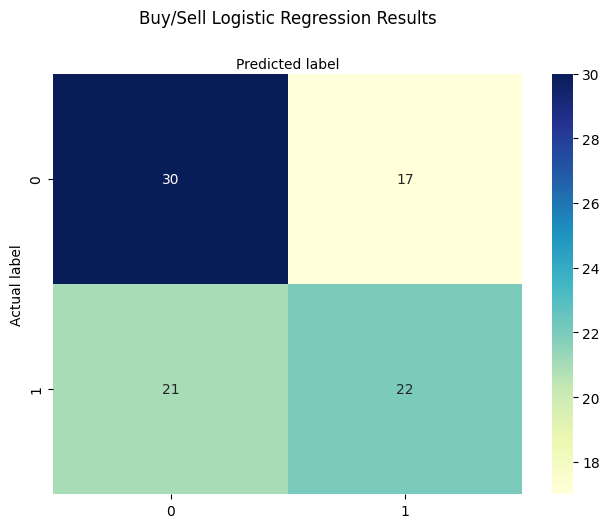

In [13]:
class_names=['Sell','Buy'] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Buy/Sell Logistic Regression Results', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

# Describes accuracy of predicted overlap between the actual buy/sell occurrences in the dataset and those instead
# predicted by the logistic regression mode;.

In [20]:
#Decision Tree method: Hyperparameter Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : (2, 5, 10, 20, 50), 'max_features' : (2, 5, 10, 15, 20, None)}

tree = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(tree, parameters, cv = 3, n_jobs = -1)

clf.fit(binX_train, biny_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': (2, 5, 10, 20, 50),
                         'max_features': (2, 5, 10, 15, 20, None)})

Text(0.5, 23.52222222222222, 'Maximum Features per Split')

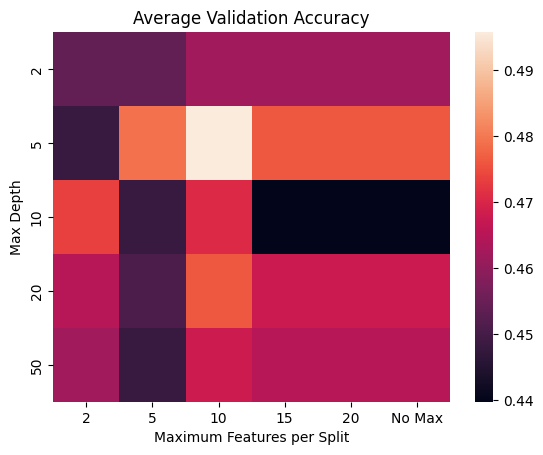

In [23]:
#Decision Tree: Hyper Parameter results
resultsColumns = sorted(clf.cv_results_.keys())
scores = pd.DataFrame(clf.cv_results_, columns = resultsColumns)[['param_max_depth', 'param_max_features', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
average = scores[['split0_test_score', 'split1_test_score', 'split2_test_score']].mean(axis = 1)

scores['average'] = average
scores.drop(axis = 1, columns = ['split0_test_score', 'split1_test_score', 'split2_test_score'], inplace = True)

y = [2, 5, 10, 20, 50]
x = [2, 5, 10, 15, 20, "No Max"]
average = average.to_numpy().reshape(len(y),len(x))

sns.heatmap(average, xticklabels = x, yticklabels = y)
plt.title('Average Validation Accuracy')
plt.ylabel('Max Depth')
plt.xlabel('Maximum Features per Split')

Random State: 697 Training Score: 0.5798319327731093 Testing Score: 0.5555555555555556
Random State: 328 Training Score: 0.5882352941176471 Testing Score: 0.5333333333333333
Random State: 674 Training Score: 0.5826330532212886 Testing Score: 0.5222222222222223
Random State: 220 Training Score: 0.5798319327731093 Testing Score: 0.5444444444444444
Random State: 201 Training Score: 0.5798319327731093 Testing Score: 0.5666666666666667
Random State: 912 Training Score: 0.6106442577030813 Testing Score: 0.5666666666666667
Random State: 62 Training Score: 0.5882352941176471 Testing Score: 0.5555555555555556
Random State: 783 Training Score: 0.5798319327731093 Testing Score: 0.5666666666666667
Random State: 940 Training Score: 0.5938375350140056 Testing Score: 0.5444444444444444
Random State: 812 Training Score: 0.6050420168067226 Testing Score: 0.5777777777777777


Text(0.5, 23.52222222222222, 'Predicted label')

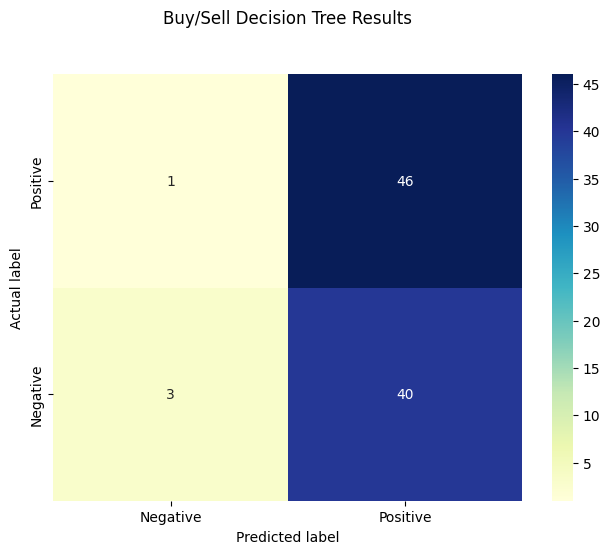

In [137]:
#Decision Tree: Training and Testing for different random states
import random as random
from sklearn.metrics import confusion_matrix

for i in range(10):
    r = random.randint(0, 1000)
    tree = DecisionTreeClassifier(max_depth = 5, max_features = 10, random_state=r)
    tree.fit(binX_train, biny_train)
    print("Random State: " + str(r) + " Training Score: " + str(tree.score(binX_train, biny_train)) + " Testing Score: " + str(tree.score(binX_test, biny_test)))

y_pred = adaShort.predict(binX_test)

confMat = confusion_matrix(biny_test, y_pred)

sns.heatmap(pd.DataFrame(confMat), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels = ["Negative", "Positive"], yticklabels = ["Positive", "Negative"])

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Buy/Sell Decision Tree Results', y=1.1)

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

In [45]:
#Forest by Adaboost: Hyperparameter Training pt. 1
from sklearn.ensemble import AdaBoostClassifier

origTree = DecisionTreeClassifier(max_depth = 5, max_features = 10, random_state=42)
shortTree = DecisionTreeClassifier(max_depth = 5, max_features = 5, random_state=42)

parameters = {'n_estimators' : (2, 5, 10, 20, 50, 100, 200, 500), 'base_estimator' : (None, shortTree, origTree)}

ada = AdaBoostClassifier(random_state=42)
clf = GridSearchCV(ada, parameters, cv = 3, n_jobs = -1)

clf.fit(binX_train, biny_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'base_estimator': (None,
                                            DecisionTreeClassifier(max_depth=5,
                                                                   max_features=5,
                                                                   random_state=42),
                                            DecisionTreeClassifier(max_depth=5,
                                                                   max_features=10,
                                                                   random_state=42)),
                         'n_estimators': (2, 5, 10, 20, 50, 100, 200, 500)})

Text(0.5, 23.52222222222222, 'Tree Types')

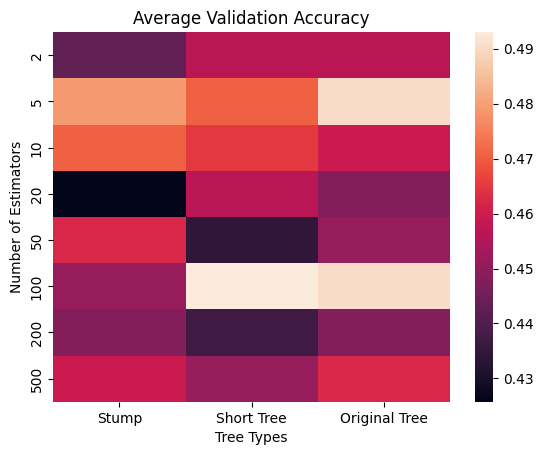

In [46]:
#Forest: Hyper Parameter results pt. 1
resultsColumns = sorted(clf.cv_results_.keys())
scores = pd.DataFrame(clf.cv_results_, columns = resultsColumns)[['param_n_estimators', 'param_base_estimator', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
average = scores[['split0_test_score', 'split1_test_score', 'split2_test_score']].mean(axis = 1)

scores['average'] = average
scores.drop(axis = 1, columns = ['split0_test_score', 'split1_test_score', 'split2_test_score'], inplace = True)

y = [2, 5, 10, 20, 50, 100, 200, 500]
x = ["Stump", "Short Tree", "Original Tree"]
average = average.to_numpy().reshape(len(y),len(x))

sns.heatmap(average, xticklabels = x, yticklabels = y)
plt.title('Average Validation Accuracy')
plt.ylabel('Number of Estimators')
plt.xlabel('Tree Types')

In [54]:
#Forest by Adaboost: Hyperparameter Training pt. 2
parameters = {'learning_rate' : (0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 40), 'base_estimator' : (None, shortTree, origTree)}

ada = AdaBoostClassifier(n_estimators = 100, random_state=42)
clf = GridSearchCV(ada, parameters, cv = 3, n_jobs = -1)

clf.fit(binX_train, biny_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(n_estimators=100, random_state=42),
             n_jobs=-1,
             param_grid={'base_estimator': (None,
                                            DecisionTreeClassifier(max_depth=5,
                                                                   max_features=5,
                                                                   random_state=42),
                                            DecisionTreeClassifier(max_depth=5,
                                                                   max_features=10,
                                                                   random_state=42)),
                         'learning_rate': (0.0001, 0.001, 0.01, 0.1, 1, 2, 5,
                                           10, 20, 40)})

Text(0.5, 23.52222222222222, 'Tree Types')

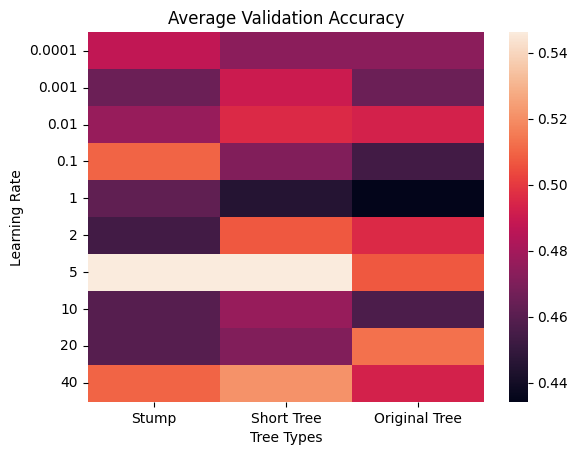

In [55]:
#Forest: Hyper Parameter results pt. 2
resultsColumns = sorted(clf.cv_results_.keys())
scores = pd.DataFrame(clf.cv_results_, columns = resultsColumns)[['param_learning_rate', 'param_base_estimator', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
average = scores[['split0_test_score', 'split1_test_score', 'split2_test_score']].mean(axis = 1)

scores['average'] = average
scores.drop(axis = 1, columns = ['split0_test_score', 'split1_test_score', 'split2_test_score'], inplace = True)

y = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 40]
x = ["Stump", "Short Tree", "Original Tree"]
average = average.to_numpy().reshape(len(y),len(x))

sns.heatmap(average, xticklabels = x, yticklabels = y)
plt.title('Average Validation Accuracy')
plt.ylabel('Learning Rate')
plt.xlabel('Tree Types')

In [101]:
#Forest by Adaboost: Hyperparameter Training pt. 3
random_numbers = (random.randint(0, 1000), random.randint(0, 1000), random.randint(0, 1000), random.randint(0, 1000), random.randint(0, 1000), random.randint(0, 1000), random.randint(0, 1000), random.randint(0, 1000), random.randint(0, 1000), random.randint(0, 1000))
parameters = {'random_state' : random_numbers, 'base_estimator' : (None, shortTree, origTree)}

ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 5)
clf = GridSearchCV(ada, parameters, cv = 3, n_jobs = -1)

clf.fit(binX_train, biny_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(learning_rate=5, n_estimators=100),
             n_jobs=-1,
             param_grid={'base_estimator': (None,
                                            DecisionTreeClassifier(max_depth=5,
                                                                   max_features=5,
                                                                   random_state=42),
                                            DecisionTreeClassifier(max_depth=5,
                                                                   max_features=10,
                                                                   random_state=42)),
                         'random_state': (78, 676, 377, 412, 29, 14, 497, 555,
                                          918, 583)})

Max Scores: [0.5070028  0.52661064 0.54061625]
Average Scores: [0.48963585 0.49187675 0.49859944]


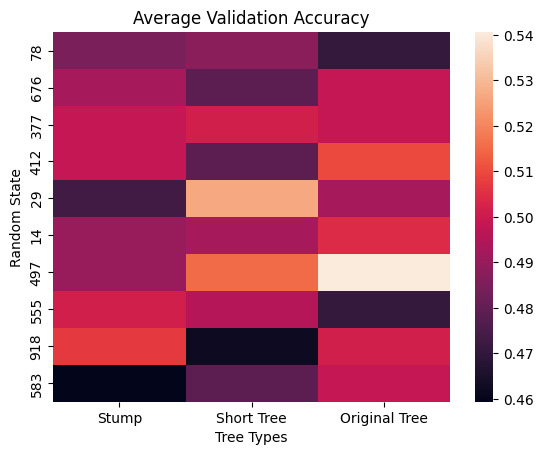

In [102]:
#Forest: Hyper Parameter results pt. 3
resultsColumns = sorted(clf.cv_results_.keys())
scores = pd.DataFrame(clf.cv_results_, columns = resultsColumns)[['param_random_state', 'param_base_estimator', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
average = scores[['split0_test_score', 'split1_test_score', 'split2_test_score']].mean(axis = 1)

scores['average'] = average
scores.drop(axis = 1, columns = ['split0_test_score', 'split1_test_score', 'split2_test_score'], inplace = True)

y = random_numbers
x = ["Stump", "Short Tree", "Original Tree"]
average = average.to_numpy().reshape(len(y),len(x))

sns.heatmap(average, xticklabels = x, yticklabels = y)
plt.title('Average Validation Accuracy')
plt.ylabel('Random State')
plt.xlabel('Tree Types')
print("Max Scores: " + str(average.max(axis = 0)))
print("Average Scores: " + str(average.mean(axis = 0)))

In [115]:
#Forest: Training and Testing Results pt. 1

print("Decision Stump:")
for i in range(10):
    r = random.randint(0, 1000)
    ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 5)
    ada.fit(binX_train, biny_train)
    print("   Random State: " + str(r) + " Training Score: " + str(ada.score(binX_train, biny_train)) + " Testing Score: " + str(ada.score(binX_test, biny_test)))
    
print("Short Tree:")
for i in range(10):
    r = random.randint(0, 1000)
    ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 5, base_estimator = shortTree)
    ada.fit(binX_train, biny_train)
    print("   Random State: " + str(r) + " Training Score: " + str(ada.score(binX_train, biny_train)) + " Testing Score: " + str(ada.score(binX_test, biny_test)))
    
print("Short Tree:")
for i in range(10):
    r = random.randint(0, 1000)
    ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 5, base_estimator = origTree)
    ada.fit(binX_train, biny_train)
    print("   Random State: " + str(r) + " Training Score: " + str(ada.score(binX_train, biny_train)) + " Testing Score: " + str(ada.score(binX_test, biny_test)))

Decision Stump:
   Random State: 906 Training Score: 0.4789915966386555 Testing Score: 0.4666666666666667
   Random State: 92 Training Score: 0.4789915966386555 Testing Score: 0.4666666666666667
   Random State: 225 Training Score: 0.4789915966386555 Testing Score: 0.4666666666666667
   Random State: 999 Training Score: 0.4789915966386555 Testing Score: 0.4666666666666667
   Random State: 784 Training Score: 0.4789915966386555 Testing Score: 0.4666666666666667
   Random State: 449 Training Score: 0.4789915966386555 Testing Score: 0.4666666666666667
   Random State: 355 Training Score: 0.4789915966386555 Testing Score: 0.4666666666666667
   Random State: 150 Training Score: 0.4789915966386555 Testing Score: 0.4666666666666667
   Random State: 458 Training Score: 0.4789915966386555 Testing Score: 0.4666666666666667
   Random State: 316 Training Score: 0.4789915966386555 Testing Score: 0.4666666666666667
Short Tree:
   Random State: 228 Training Score: 0.5966386554621849 Testing Score: 0.

Text(0.5, 23.52222222222222, 'Predicted label')

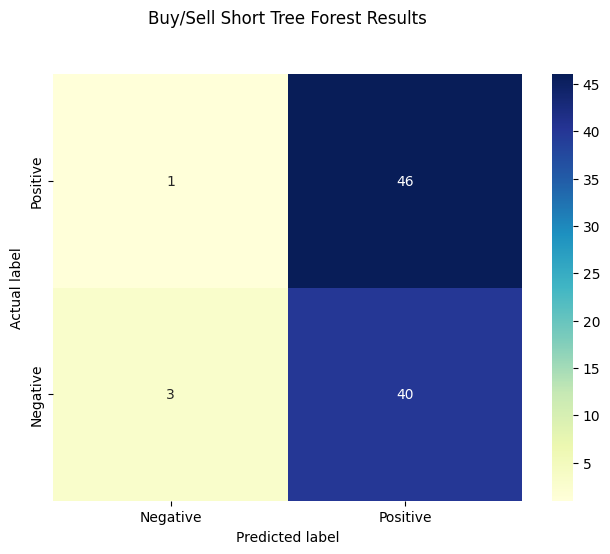

In [138]:
#Forest: Training and Testing Results pt. 2
#Two random states selected as they both reached a testing score of 50.77 in previous block
adaShort = AdaBoostClassifier(n_estimators = 100, learning_rate = 5, base_estimator = shortTree, random_state = 944)
adaOrig = AdaBoostClassifier(n_estimators = 100, learning_rate = 5, base_estimator = shortTree, random_state = 555)

adaShort.fit(binX_train, biny_train)
adaOrig.fit(binX_train, biny_train)

y_sPred = adaShort.predict(binX_test)
y_oPred = adaOrig.predict(binX_test)

confShort = confusion_matrix(biny_test, y_sPred)
confOrig = confusion_matrix(biny_test, y_oPred)

sns.heatmap(pd.DataFrame(confShort), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels = ["Negative", "Positive"], yticklabels = ["Positive", "Negative"]) 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Buy/Sell Short Tree Forest Results', y=1.1)

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

Text(0.5, 23.52222222222222, 'Predicted label')

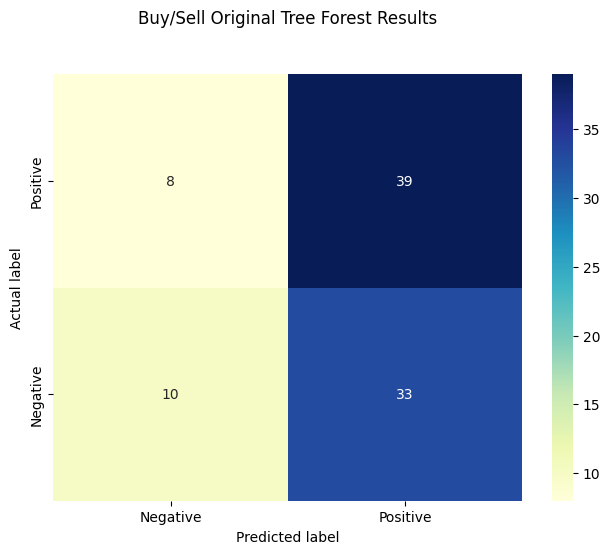

In [139]:
sns.heatmap(pd.DataFrame(confOrig), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels = ["Negative", "Positive"], yticklabels = ["Positive", "Negative"]) 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Buy/Sell Original Tree Forest Results', y=1.1)

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')